<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [16.4 Least Squares Regression in Python](chapter16.04-Least-Squares-Regression-in-Python.ipynb)   | [Contents](Index.ipynb) | [16.6 Summary and Problems](chapter16.06-Summary-and-Problems.ipynb)    >

# Least Square Regression for Nonlinear Functions

A least squares regression requires that the estimation function be a linear combination of basis functions. There are some functions that cannot be put in this form, but where a least squares regression is
still appropriate.

Introduced below are several ways to deal with nonlinear functions.

* We can accomplish this by taking advantage of the properties of logarithms, and transform the non-linear function into a linear function
* We can use the `curve_fit` function from `scipy` to estimate directly the parameters for the non-linear function using least square.

### Log tricks for exponential functions

Assume you have a function in the form $\hat{y}(x) = {\alpha} e^{{\beta} x}$ and data for $x$ and $y$, and that you want to perform least squares regression to find ${\alpha}$ and ${\beta}$. Clearly, the previous set of basis functions (linear) would be inappropriate to describe $\hat{y}(x)$; however, if we take the $\log$ of both sides, we get $\log(\hat{y}(x)) = \log({\alpha}) + {\beta} x$. Now, say that $\tilde{y}(x) = \log(\hat{y}(x))$ and $\tilde{{\alpha}} = \log({\alpha})$, then $\tilde{y}(x) = \tilde{{\alpha}} + {\beta} x$. Now, we can perform a least squares regression on the linearized expression to find $\tilde{y}(x), \tilde{{\alpha}}$, and ${\beta}$, and then recover ${{\alpha}}$ by using the expression ${\alpha} = e^{\tilde{{\alpha}}}$.

For the example below, we will generate data using $\alpha = 0.1$ and $\beta = 0.3$.

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [2]:
# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

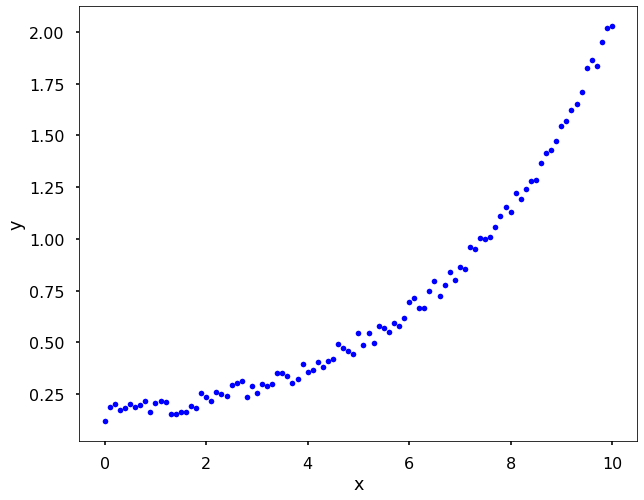

In [3]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Let's fit the data after we applied the log trick.  

In [4]:
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

alpha=0.13775180674623988, beta=0.2632636182118649


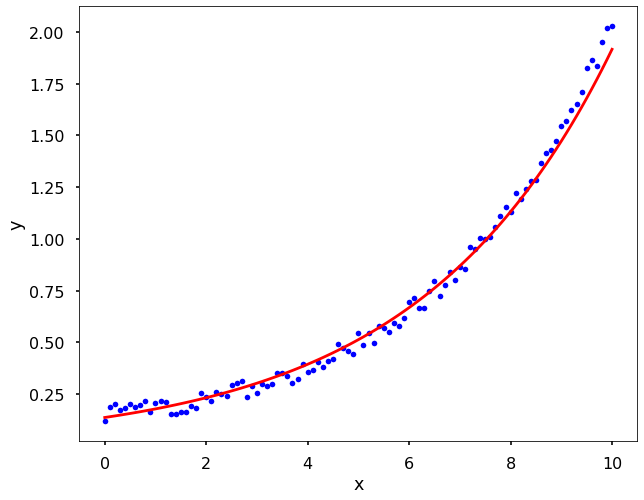

In [5]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Log tricks for power functions

The power function case is very similar. Assume we have a function in the form $\hat{y}(x) = bx^m$ and data for $x$ and $y$. Then we can turn this function into a linear form by taking $\log$ to both sides: $\log(\hat{y}(x)) = m\log(x) + \log{b}$. Therefore, we can solve this function as a linear regression. Since it is very similar to the above example, we will not spend more time on this. 

### Polynomial regression

We can also use polynomial and least squares to fit a nonlinear function. Previously, we have our functions all in linear form, that is, $y = ax + b$. But **polynomials** are functions with the following form:

$$f(x) = a_nx^n + a_{n-1}x^{n-1} + \cdots + a_2x^2 + a_1x^1 + a_0$$

where $a_n, a_{n-1}, \cdots, a_2, a_1, a_0$ are the real number coefficients, and $n$, a nonnegative integer, is the **order** or **degree** of the polynomial. If we have a set of data points, we can use different order of polynomials to fit it. The coefficients of the polynomials can be estimated using the least squares method as before, that is, minimizing the error between the real data and the polynomial fitting results. 

In Python, we can use `numpy.polyfit` to obtain the coefficients of different order polynomials with the least squares. With the coefficients, we then can use `numpy.polyval` to get specific values for the given coefficients. Let us see an example how to perform this in Python. 

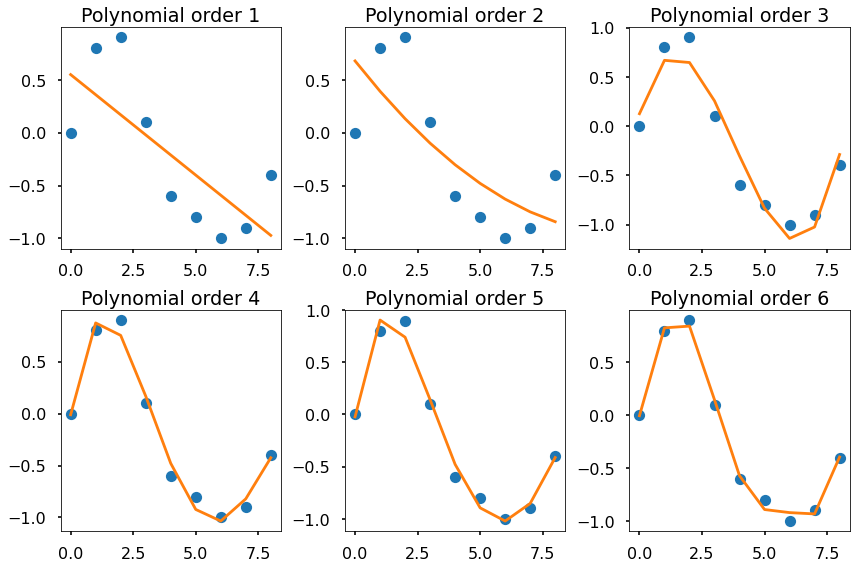

In [6]:
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):
    
    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

The figure above shows that we can use different order of polynomials to fit the same data. The higher the order, the curve we used to fit the data will be more flexible to fit the data. But what order to use is not a simple question, it depends on the specific problems in science and engineering.

### Use optimize.curve_fit from scipy

We can use the `curve_fit` function to fit any form function and estimate the parameters of it. Here is how we solve the above problem in the log tricks section using the `curve_fit` function. 

In [7]:
# let's define the function form
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

alpha=0.12304858139686883, beta=0.28029579624162054


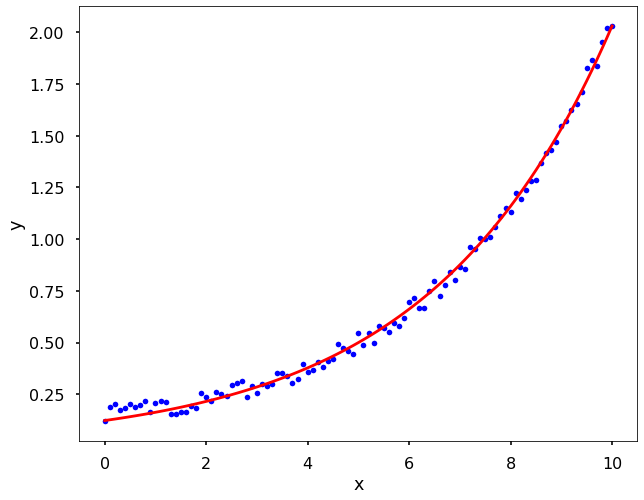

In [8]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<!--NAVIGATION-->
< [16.4 Least Squares Regression in Python](chapter16.04-Least-Squares-Regression-in-Python.ipynb)   | [Contents](Index.ipynb) | [16.6 Summary and Problems](chapter16.06-Summary-and-Problems.ipynb)    >